<span style="font-size: 14pt">MIPT, Advanced ML, Autumn 2017</span>

<span style="font-size: 16pt"> Seminars #1: Exponential smoothing models

<span style="color:blue; font-size: 12pt">Alexey Romanenko </span>,
<span style="color:blue; font-size: 12pt; font-family: 'Verdana'">alexromsput@gmail.com</span>

**Key words:** 
    - components of time series, simple exponential smoothing, adaptive exponential smoothing, Holt model, Winters model, Theil-Wage model    

<h3> Plan </h3>
  * **Reminder: Time series example** (20 minutes)
      - TS in Retail
      - Monthly Wage TS
      - <span style="color:gold; font-size: 12pt"> Loss Functions</span> (self-study)
      
  * **Simple ES ** (30 minutes)
      - from Simple Avaraging to Exponential Smoothing
      - Parameters Initialization
      - <span style="color:gold; font-size: 12pt"> Adaptive ES</span> (self-study)
      
  * **Practice: Winters and Holt model Realization** (30 minutes)
     - SES for Monthly Wage Data  
     - SES for Yearly Wage Data
     - Holt Method Realization

In [53]:
import numpy as np
from datetime import datetime, timedelta
import pylab
import matplotlib.pyplot as plt
import pandas as pd
import math
import pandas.tseries.offsets as ofs
import warnings as w
from matplotlib import gridspec
# import plotly.plotly as py
import seaborn as sns

from IPython.display import Image

%matplotlib inline

<h1 align="center"> Time series Examples </h1>

# TS in Retail

In [54]:
# ts = pd.read_csv('data/TimeSeries_Data10.csv', sep=',', decimal='.',parse_dates={'Timestamp': pd.to_datetime(['Dates'],dayfirst=True, errors='coerce')}, index_col='Timestamp')
ts = pd.read_csv('./data/TimeSeries_Data10.csv', sep=',', decimal='.', parse_dates=True, dayfirst=True, index_col='Dates')
ts.index.names=['Timestamp']
ts = ts.sort_index() # sort index
ts.head()

,Item: 165,Item: 969,Item: 2653,Item: 2654,Item: 2692,Item: 2695,Item: 2697,Item: 2765,Item: 2767,Item: 2806,Item: 2808
Timestamp,,,,,,,,,,,
2005-01-11,NaN,2.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005-01-12,NaN,5.0,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005-01-13,NaN,2.0,20.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005-01-14,NaN,42.0,14.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005-01-15,NaN,NaN,23.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [55]:
# Period of ts
ts[-50:-45]

,Item: 165,Item: 969,Item: 2653,Item: 2654,Item: 2692,Item: 2695,Item: 2697,Item: 2765,Item: 2767,Item: 2806,Item: 2808
Timestamp,,,,,,,,,,,
2009-01-12,6.0,5.0,NaN,13.0,9.0,2.0,5.0,2.0,NaN,NaN,NaN
2009-01-13,2.0,3.0,NaN,16.0,10.0,5.0,1.0,13.0,NaN,NaN,NaN
2009-01-14,6.0,5.0,0.0,9.0,3.0,3.0,0.0,2.0,NaN,NaN,NaN
2009-01-15,8.0,18.0,11.0,6.0,5.0,11.0,1.0,2.0,NaN,NaN,NaN
2009-01-16,9.0,6.0,20.0,5.0,6.0,3.0,6.0,19.0,NaN,NaN,NaN


In [56]:
# Interval of ts 
ts.loc['2009-01-01':'2009-01-05']

,Item: 165,Item: 969,Item: 2653,Item: 2654,Item: 2692,Item: 2695,Item: 2697,Item: 2765,Item: 2767,Item: 2806,Item: 2808
Timestamp,,,,,,,,,,,
2009-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2009-01-02,0.0,1.0,9.0,8.0,5.0,5.0,3.0,20.0,NaN,NaN,NaN
2009-01-03,7.0,6.0,6.0,14.0,12.0,3.0,2.0,1.0,NaN,NaN,NaN
2009-01-04,4.0,0.0,11.0,12.0,5.0,6.0,3.0,NaN,NaN,NaN,NaN
2009-01-05,7.0,7.0,9.0,20.0,10.0,5.0,2.0,14.0,NaN,NaN,NaN


**Questions** 
    - Which charachteristic of TS can you mention so far?
    - Which components of TS can you see?

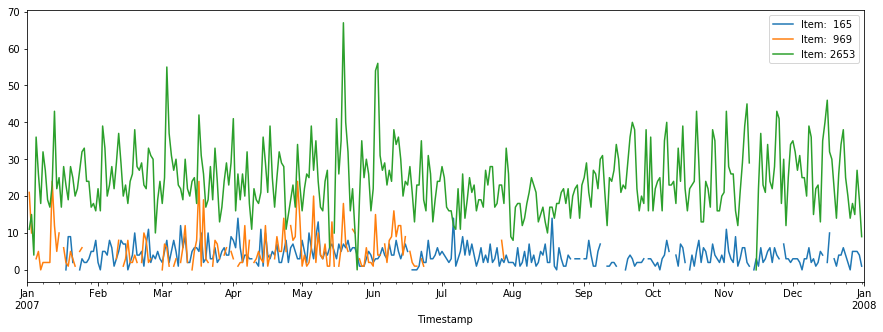

In [57]:
# fig = plt.figure()
ts.loc['2007-01-01':'2008-01-01', ts.columns[range(3)]].plot(figsize=(15,5))
# to save the pictures
# plt.savefig('../Lecture_TS_Forecasting/pic/TS_Example.eps', bbox_inches='tight', pad_inches=0, format='eps', dpi=1000) 

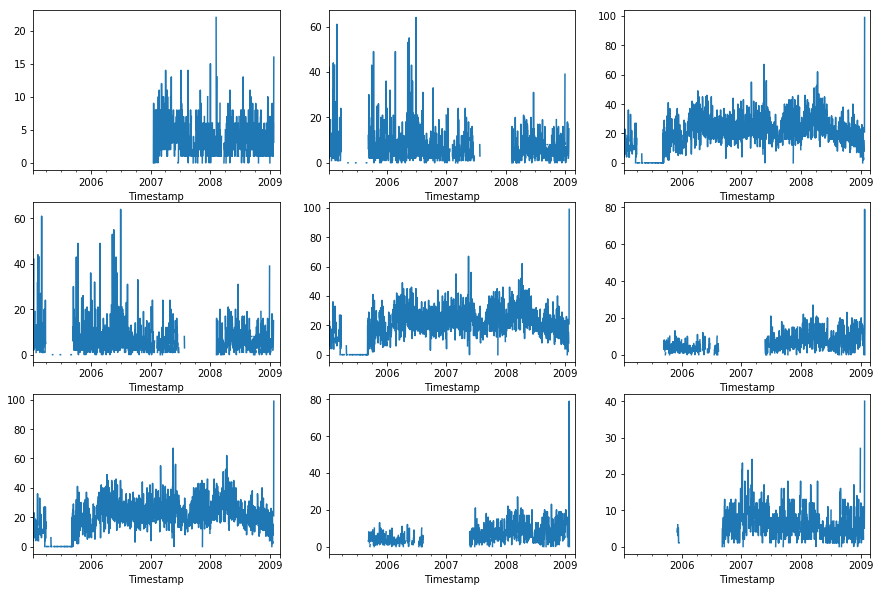

In [58]:
fig = plt.figure(figsize=(15,10))
gs = gridspec.GridSpec(3, 3)
for i in range(3):
    for j in range(3):
        fig.add_subplot(gs[i,j])
        ts.loc[:, ts.columns[i+j]].plot()

# Monthly Wage TS

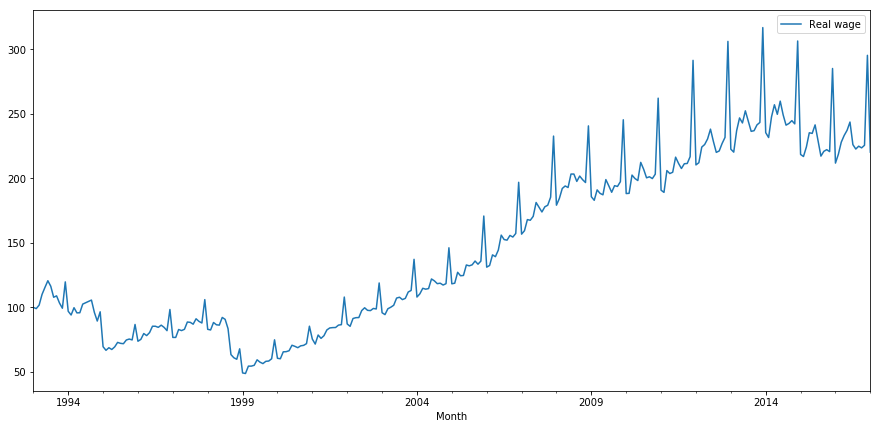

In [59]:
wage = pd.read_csv('./data/monthly-wage.csv', sep=';', decimal='.', index_col= 0, parse_dates=True, dayfirst=True)
wage.plot(figsize=(15,7))

**Questions** 
    - Which charachteristic of TS can you mention so far?
    - Which components of TS can you see?

# Loss functions

$$  SSE =\sum_{t=1}^T  \left({A_t-F_t}\right)^2 $$
$$  MSE =\frac{1}{T}\sum_{t=1}^T  \left({A_t-F_t}\right)^2 $$
$$  RMSE =\sqrt{\frac{1}{T}\sum_{t=1}^T  \left({A_t-F_t}{A_t}\right)} $$
$$  MAE =\frac{100}{T}\sum_{t=1}^T  \left|{A_t-F_t}\right| $$
$$  MAPE =\frac{1}{T}\sum_{t=1}^T  \left|\frac{A_t-F_t}{A_t}\right| $$
$$  MACAPE =\frac{2}{T}\sum_{t=1}^T  \left|\frac{A_t-F_t}{A_t+F_t}\right| $$
$$  MedianAE = Median \bigl(\left|A_1-F_1\right|,\dots,\left|A_T-F_T\right|\bigr) $$

In [60]:
# Quality functions
def qualitySSE(x,y):
    # Sum squared error
    # x,y - pandas structures
    # x - real values
    # y - forecasts
    return ((x-y)**2).sum(), (x-y)**2

def qualityMSE(x,y):
    # Mean squared error
    # x,y - pandas structures
    # x - real values
    # y - forecasts
    return ((x-y)**2).mean() , (x-y)**2

def qualityRMSE(x,y):
    # Root mean squared error
    # x,y - pandas structures
    # x - real values
    # y - forecasts
    return (((x-y)**2).mean())**(0.5) , (x-y)**2

def qualityMAE(x,y):
    # Mean absolute error
    # x,y - pandas structures
    # x - real values
    # y - forecasts
    return (x-y).abs().mean(), (x-y).abs()

def qualityMAPE(x,y):
    # Mean absolute percentage error
    # x,y - pandas structures
    # x - real values
    # y - forecasts
    qlt = ((x-y).abs()/x).replace([np.inf, -np.inf], np.nan)
    return qlt.mean() , (x-y).abs()

def qualityMACAPE(x,y):
    # Mean average corrected absolute percentage error
    # x,y - pandas structures
    # x - real values
    # y - forecasts
    qlt = (2*(x-y).abs()/(x+y)).replace([np.inf, -np.inf], np.nan)
    return qlt.mean() , (x-y).abs()

def qualityMedianAE(x,y):
    # Median absolute error
    # x,y - pandas structures
    # x - real values
    # y - forecasts
    return ((x-y).abs()).median(), (x-y).abs()

<h1 align="center"> Simple Exponential  </h1> </h1>

# from Simple Averaging to Exponential Smoothing

** Rolling window n **
       $$\frac{1}{n}\left(y_{t-n}+\dots+ {y}_t\right)$$
   
** All points in  $[t-n, t]$ has the same weight **
                                   $$w = \frac{1}{n}$$
** Other points has weight**
                                    $$w = 0$$

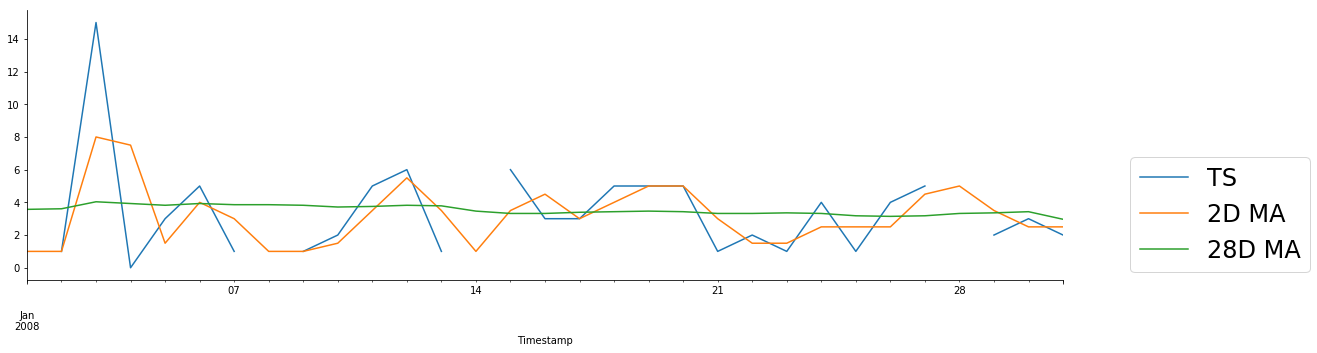

In [61]:
# Rolling (т = 2 и n=28)
# Caution: you need replace NaN
ts.loc['2008-01-01':'2008-01-31'][u'Item:  165'].plot(label='TS')
ts[u'Item:  165'].fillna(method='pad').rolling(2).mean().loc['2008-01-01':'2008-01-31'].plot(label='2D MA', figsize=(15,5))
ts[u'Item:  165'].fillna(method='pad').rolling(28).mean().loc['2008-01-01':'2008-01-31'].plot(label='28D MA', figsize=(15,5))

plt.legend(bbox_to_anchor=(1.25, .5), prop={'size':24})
plt.tight_layout()
sns.despine()

** Expanding window **
##       $$\frac{1}{t}\left(y_{1}+\dots+ {y}_t\right)$$
   
** All time points in $[1, t]$ has the same weight **
##                                   $$w = \frac{1}{t}$$   

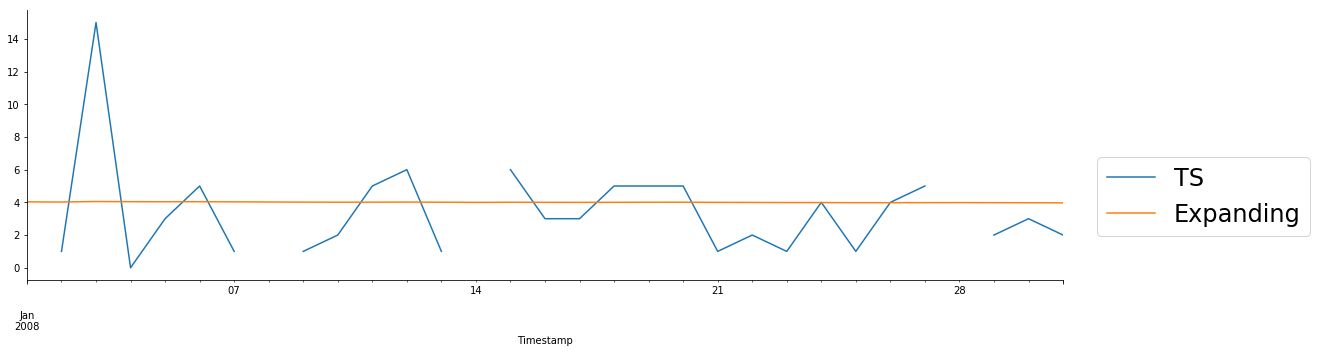

In [62]:
# Expanding
ts.loc['2008-01-01':'2008-01-31'][u'Item:  165'].plot(label='TS')
ts.fillna(method='pad')[u'Item:  165'].expanding().mean().loc['2008-01-01':'2008-01-31'].plot(label='Expanding', figsize=(15,5))

plt.legend(bbox_to_anchor=(1.25, .5), prop={'size':24})
plt.tight_layout()
sns.despine()

** Exponentialy diminishing weights **
  ##    $$\sum_{\tau=1}^t \alpha\cdot (1-\alpha)^{t-\tau}\cdot y_\tau$$
   
** Weight for time point in moment $\tau$  **
    
 ##                              $$w_\tau = \alpha\cdot (1-\alpha)^{t-\tau}$$  


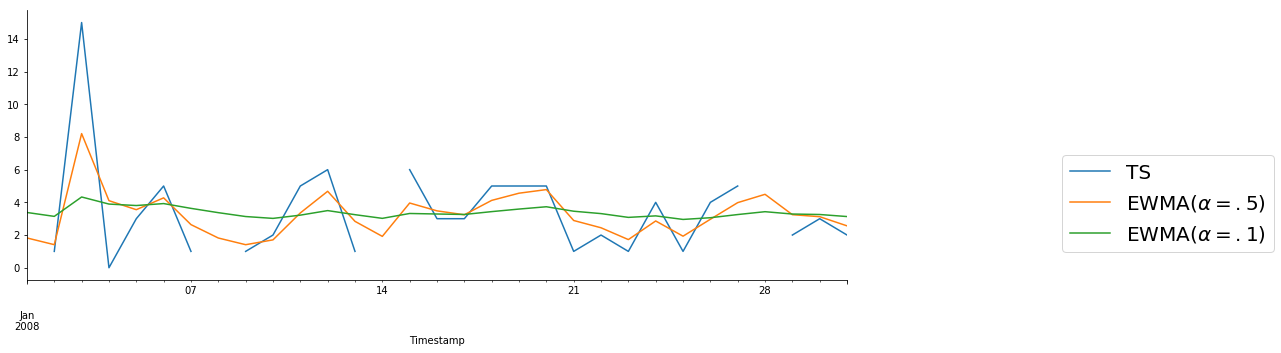

In [63]:
# Averaging with exponential weights
ts.loc['2008-01-01':'2008-01-31'][u'Item:  165'].plot(label='TS')
ts.fillna(method='pad')[u'Item:  165'].ewm(alpha=0.5).mean().loc['2008-01-01':'2008-01-31'].plot(label='EWMA($\\alpha=.5$)') 
ts.fillna(method='pad')[u'Item:  165'].ewm(alpha=0.1).mean().loc['2008-01-01':'2008-01-31'].plot(label='EWMA($\\alpha=.1$)', figsize=(12,5)) 

plt.legend(bbox_to_anchor=(1.25, .5), prop={'size':20})
plt.tight_layout()
sns.despine()

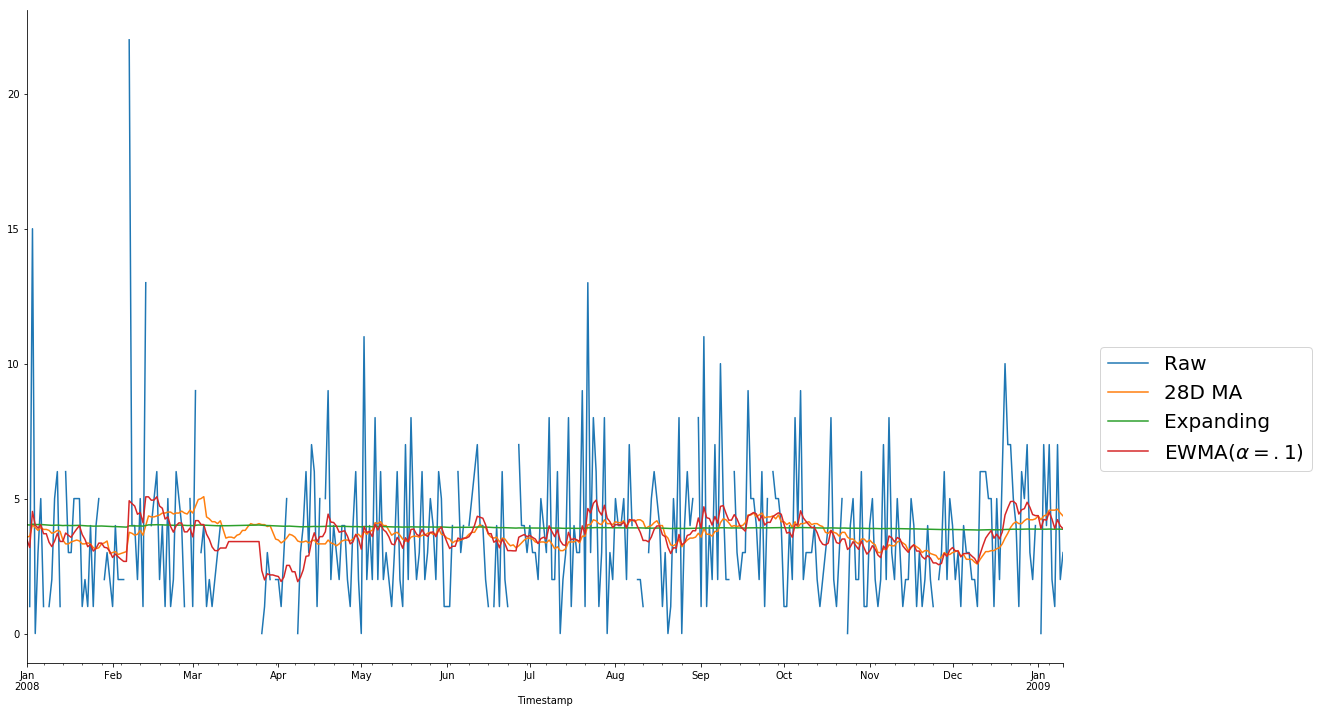

In [64]:
# Compare all methods
ts.loc['2008-01-01':'2009-01-10'][u'Item:  165'].plot(label='Raw')
ts[u'Item:  165'].fillna(method='pad').rolling(28).mean().loc['2008-01-01':'2009-01-10'].plot(label='28D MA')
ts[u'Item:  165'].fillna(method='pad').expanding().mean().loc['2008-01-01':'2009-01-10'].plot(label='Expanding')
ts[u'Item:  165'].ewm(alpha=0.1).mean().loc['2008-01-01':'2009-01-10'].plot(label='EWMA($\\alpha=.1$)', figsize=(15,10)) 

plt.legend(bbox_to_anchor=(1.25, .5), prop={'size':20})
plt.tight_layout()
sns.despine()

# Simple Exponential Smoothing

* Forecast model:
## $$\hat{y}_{t+1} = \alpha\cdot y_t+ (1-\alpha)\cdot \hat{y}_t$$

  
* Sum notation:
## $$\hat{y}_{t+1} = \sum_{\tau=1}^t \alpha\cdot (1-\alpha)^{t-\tau}\cdot y_\tau$$

** Question: **
 * What is the problem with this formla?
 * Hint: calculate sum of weights of time series points.

In [65]:
# Example of realization

# Simple Exponential Smoothing (ЭСС)
# x <array Tx1>- time series, 
# h <scalar> - forecasting delay
# Params <dict> - dictionary with 
#    alpha <scalar in [0,1]> - smoothing parameter

def SimpleExponentialSmoothing(x, h, Params):
    T = len(x)
    alpha = Params['alpha']
    FORECAST = [np.NaN]*(T+h)
    if alpha>1:
        w.warn('Alpha can not be more than 1')
        #alpha = 1
        return FORECAST
    if alpha<0:
        w.warn('Alpha can not be less than 0')
        #alpha = 0
        return FORECAST
    y = x[0]
    for cntr in range(T):
        if not math.isnan(x[cntr]):
            if math.isnan(y):
                y=x[cntr]
            y = y*(1-alpha) + alpha*x[cntr]
            #else do not nothing
        FORECAST[cntr+h] = y
    return FORECAST

In [66]:
# Forecasting delay
h = 1
start = ts.index[-1]+timedelta(1)
end = ts.index[-1]+timedelta(h)
rng = pd.date_range(start, end)
frc_ts = pd.DataFrame(index = ts.index.append(rng), columns = ts.columns)

In [67]:
# ES params
Params ={'alpha':0.1}

# forecast
for cntr in ts.columns:
    x = ts[cntr]
    frc_ts[cntr] = SimpleExponentialSmoothing(x, h, Params)

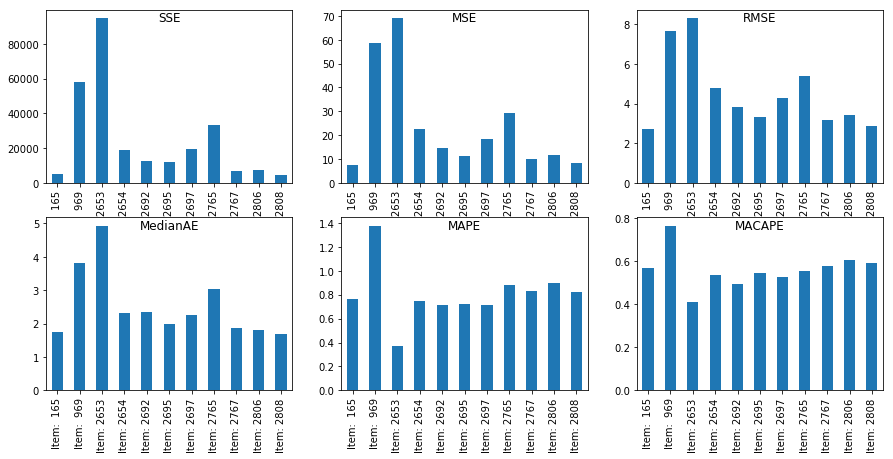

In [68]:
fig = plt.figure(figsize=(15,7))
ax1=fig.add_subplot(111)
qlt_array=['SSE', 'MSE', 'RMSE', 'MedianAE', 'MAPE', 'MACAPE']
for i in range(6):
    # Quality = [np.NaN]*len(ts.columns)
    plt.subplot(2,3,i+1)
    Quality, _ = eval('quality'+qlt_array[i])(ts, frc_ts)
    Quality.plot(kind='bar')
    plt.title(qlt_array[i], y=0.9)

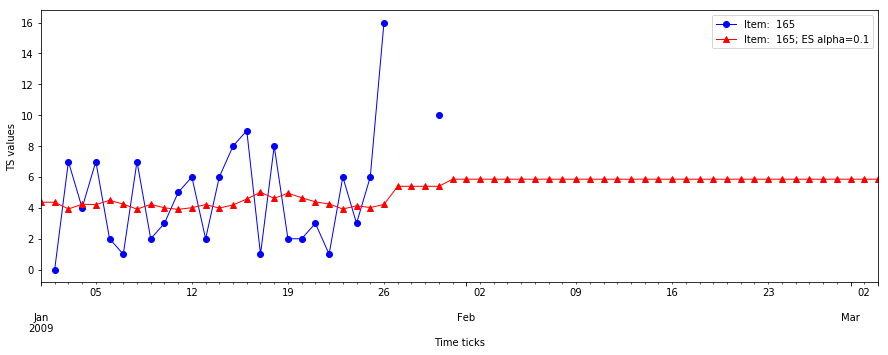

In [69]:
# show forecast alpha = 0.1
def plotTSForecast(ts, frc_ts, ts_num=0, alg_title=''):
    frc_ts.columns = ts.columns+'; '+alg_title
    ts[ts.columns[0]].plot(style='b', linewidth=1.0, marker='o')
    ax = frc_ts[frc_ts.columns[0]].plot(style='r-^', figsize=(15,5), linewidth=1.0)
    plt.xlabel("Time ticks")
    plt.ylabel("TS values")
    plt.legend()
    return ax

plotTSForecast(ts.loc['2009-01-01':'2009-03-31'], frc_ts.loc['2009-01-01':'2009-03-31'], ts_num=0, alg_title='ES alpha=0.1')

## Repeat for h=30

In [70]:
# forecast
h = 30
start = ts.index[-1]+timedelta(1)
end = ts.index[-1]+timedelta(h)
rng = pd.date_range(start, end)
frc_ts = pd.DataFrame(index = ts.index.append(rng), columns = ts.columns)

for cntr in ts.columns:
    frc_ts[cntr] = SimpleExponentialSmoothing(ts[cntr], h, {'alpha':0.1})

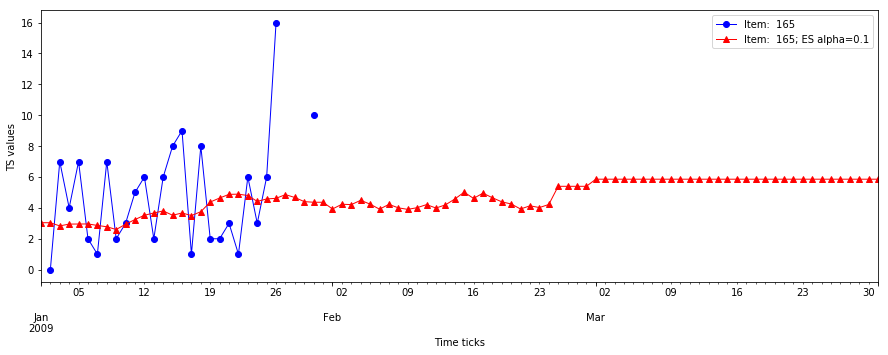

In [71]:
# show forecast h = 30, alpha = 0.1
plotTSForecast(ts.loc['2009-01-01':'2009-03-31'], frc_ts.loc['2009-01-01':'2009-03-31'], ts_num=0, alg_title='ES alpha=0.1')

## Search for the optimal $\alpha$ 

In [72]:
def BuildForecast(h, ts, AlgName, AlgTitle, ParamsArray, step='D'):
    FRC_TS = dict()

    for p in ParamsArray:
        frc_horizon = pd.date_range(wage.index[-1], periods=h+1, freq=step)[1:]
        frc_ts = pd.DataFrame(index = ts.index.append(frc_horizon), columns = ts.columns)
        
        for cntr in ts.columns:
            frc_ts[cntr] = eval(AlgName)(ts[cntr], h, p)
        
#         frc_ts.columns = frc_ts.columns+('%s %s' % (AlgTitle, p))
        FRC_TS['%s %s' % (AlgTitle, p)] = frc_ts
    
    return FRC_TS

In [126]:
#Fit parameters
ALPHA = [0.7, 0.4, 0.2, .15, 0.1, 0.05, 0.01]
ESParamsArray = [{'alpha':alpha} for alpha in ALPHA]
FRC_TS = BuildForecast(h=1, ts=ts, AlgName =  'SimpleExponentialSmoothing', AlgTitle='ES' ,ParamsArray = ESParamsArray)

### Loss of the SES forecast for all history

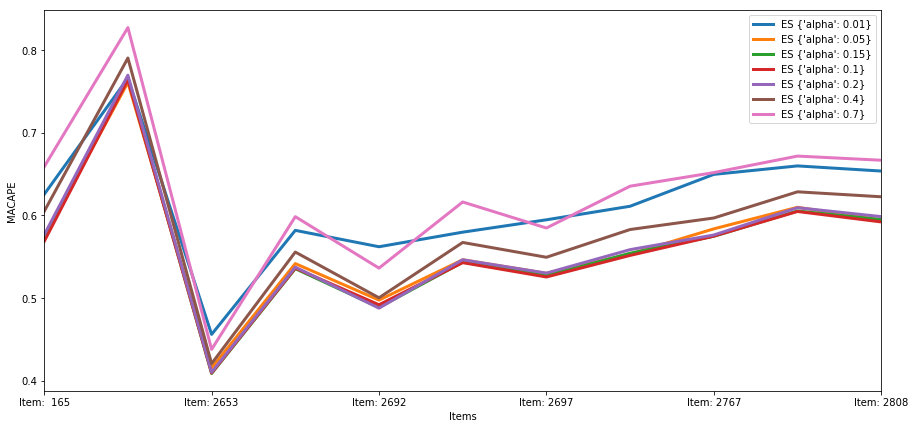

In [127]:
# compare ES parameters
QualityStr = pd.DataFrame(index = ts.columns, columns = FRC_TS.keys())

# Quality through 1500 steps
ix = ts.index
for param_cntr in sorted(QualityStr.columns):
    frc_ts = FRC_TS[param_cntr]
    QualityStr[param_cntr],_ = qualityMACAPE(ts.loc[ix], frc_ts.loc[ix])

ax = QualityStr[sorted(QualityStr.columns)].plot(figsize = (15,7), linewidth=3.0)
ax.set_xlabel("Items")
ax.set_ylabel("MACAPE")

* The optimal value of $\alpha$ is about $0.1$ 

### Loss for first time series point

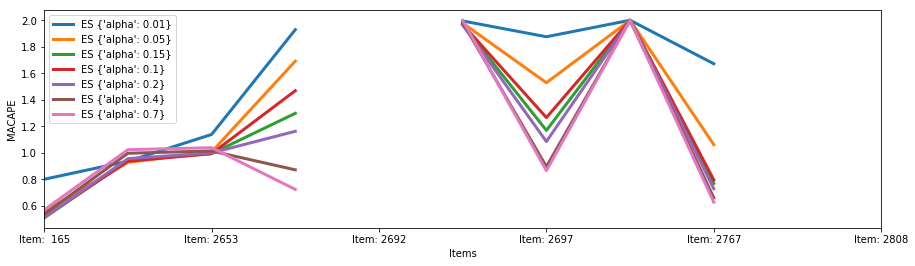

In [75]:
# Quality in first 100 steps
# ix = range(100)
for model in QualityStr.columns:
    frc_ts = FRC_TS[model]
    for ts_num in ts.columns:
        ix = pd.date_range(ts[ts_num].first_valid_index(), ts[ts_num].first_valid_index()+timedelta(150))
        QualityStr[model][ts_num],_ = qualityMACAPE(ts[ts_num].loc[ix], frc_ts[ts_num].loc[ix])

ax = QualityStr[sorted(QualityStr.columns)].plot(figsize = (15,4), linewidth=3.0)
ax.set_xlabel("Items")
ax.set_ylabel("MACAPE")

** Question:**
        Why is loss function  not calculated for some items?
        
        (Hint: see definition of loss function)

### Look at TS №3

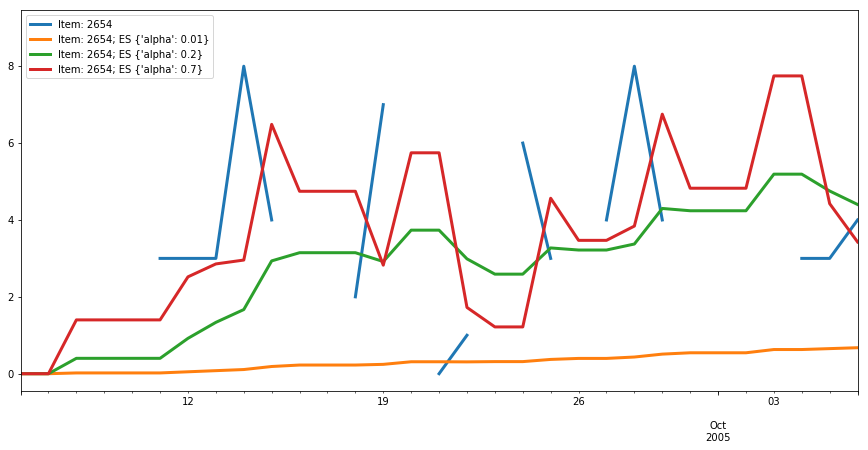

In [76]:
# ts VS forecast in first 100 steps
model_num = [0,4,6]  # [0,6], [0,4,6]
Models = sorted(FRC_TS.keys())

ts_num = 3 # 7
plot_ts = pd.DataFrame(index =ts.index)
plot_ts[ts.columns[ts_num]] = ts[ts.columns[ts_num]]
for model in model_num:
     frc_ts = FRC_TS[Models[model]]
     plot_ts[frc_ts.columns[ts_num]+'; '+Models[model]] = frc_ts[frc_ts.columns[ts_num]]

ix = pd.date_range(ts[ts.columns[ts_num]].first_valid_index()+timedelta(140), ts[ts.columns[ts_num]].first_valid_index()+timedelta(170))
plot_ts.loc[ix].plot(figsize = (15, 7), linewidth=3.0) # :250

** Wow: we need to use big $\alpha$ for first steps of ES!** 
    - We need to modify algorithm for tirst steps!

** Question: **
   How algorithm can be modified for first steps?

### Examples of modification

* First variant: let's make $\alpha$ higher for first time point of TS

In [77]:
def InitExponentialSmoothing(x, h, Params):
    T = len(x)
    alpha = Params['alpha']
    AdaptationPeriod=Params['AdaptationPeriod']
    FORECAST = [np.NaN]*(T+h)
    if alpha>1:
        w.warn('Alpha can not be more than 1')
        #alpha = 1
        return FORECAST
    if alpha<0:
        w.warn('Alpha can not be less than 0')
        #alpha = 0
        return FORECAST
    y = x[0]
    t0=0
    for t in range(0, T):
        if not math.isnan(x[t]):
            if math.isnan(y):
                y=x[t]
                t0=t
            if (t-t0+1)<AdaptationPeriod:
                y = y*(1-alpha)*(t-t0+1)/(AdaptationPeriod) + (1-(1-alpha)*(t-t0+1)/(AdaptationPeriod))*x[t]
            else:
                y = y*(1-alpha) + alpha*x[t]
            #else do not nothing
        FORECAST[t+h] = y
    return FORECAST

* Second variant: normalize weights of ES: $1 - (1-\alpha)^t$

In [78]:
def NormExponentialSmoothing(x, h, Params):
    T = len(x)
    alpha = Params['alpha']
    FORECAST = [np.NaN]*(T+h)
    if alpha>1:
        w.warn('Alpha can not be more than 1')
        #alpha = 1
        return FORECAST
    if alpha<0:
        w.warn('Alpha can not be less than 0')
        #alpha = 0
        return FORECAST
    
    y = 0
    norm = 0
    for t in range(0, T):
        if not math.isnan(x[t]):
            if math.isnan(y):
                norm=1  # initialize when first data point comes
            norm = norm*(1-alpha)
            y = y*(1-alpha) + (alpha)*x[t]
        FORECAST[t+h] = y/(1-norm)
    return FORECAST

In [128]:
#Fit parameters
ALPHA = [0.7, 0.4, 0.2, .15, 0.1, 0.05, 0.01]
ESParamsArray = [{'alpha':alpha, 'AdaptationPeriod': 5} for alpha in ALPHA]
FRC_TS.update(BuildForecast(h=1, ts=ts, AlgName =  'InitExponentialSmoothing', AlgTitle='IES' ,ParamsArray = ESParamsArray))
FRC_TS.update(BuildForecast(h=1, ts=ts, AlgName =  'NormExponentialSmoothing', AlgTitle='NES' ,ParamsArray = ESParamsArray))

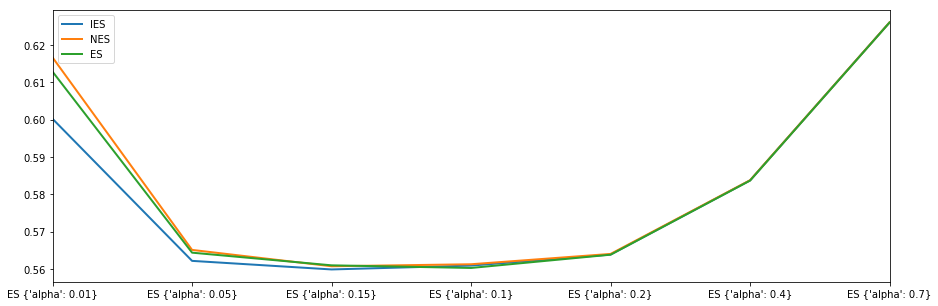

In [129]:
# compare ES methods
QualityStr = pd.DataFrame(index = ts.columns, columns = sorted(FRC_TS.keys()))

for model in sorted(QualityStr.columns):
    frc_ts = FRC_TS[model]
    QualityStr[model],_ = qualityMACAPE(ts, frc_ts)


QualityStr[sorted(QualityStr.columns)[7:14]].mean().plot(label='IES', linewidth=2.0)
QualityStr[sorted(QualityStr.columns)[14:]].mean().plot(label='NES', linewidth=2.0)
QualityStr[sorted(QualityStr.columns)[:7]].mean().plot(label='ES', figsize = (15, 5),linewidth=2.0)
# ax.set_xticklabels(np.reshape(np.asarray(QualityStr.columns[:14]), (2, 7)).T , rotation=90)
plt.legend()

* Conclusion: **The optimal value of $\alpha$ is about the same for all ES modifications.**

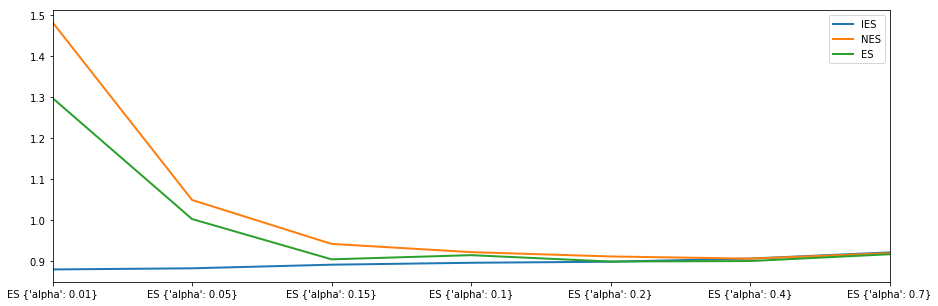

In [130]:
# compare ES methods in first 100 steps
QualityStr = pd.DataFrame(index = ts.columns, columns = sorted(FRC_TS.keys()))

for model in QualityStr.columns:
    frc_ts = FRC_TS[model]
    for ts_num in ts.columns:
        ix = pd.date_range(ts[ts_num].first_valid_index(), ts[ts_num].first_valid_index()+timedelta(50))
        QualityStr[model][ts_num],_ = qualityMACAPE(ts[ts_num].loc[ix], frc_ts[ts_num].loc[ix])


QualityStr[sorted(QualityStr.columns)[7:14]].mean().plot(label='IES', linewidth=2.0)
QualityStr[sorted(QualityStr.columns)[14:21]].mean().plot(label='NES', linewidth=2.0)
QualityStr[sorted(QualityStr.columns)[:7]].mean().plot(label='ES',  figsize = (15, 5),linewidth=2.0)
plt.legend()

# Adaptive ES (self-studying)

### Tracking signal

$e_t = y_t - \hat{y}_t$

$\tilde{e}_t = \gamma e_{t-1} + (1-\gamma) \tilde{e}_{t-1}$

$\overline{e}_t = \gamma \left|e_{t-1}\right| + (1-\gamma) \overline{e}_{t-1}$

* Tracking signal

$$K_t = \frac{\tilde{e}_t}{\overline{e}_t}$$

* to do algorithm more stable 
$$\alpha_t = \left|K_{t-1}\right|$$

In [82]:
# AdaptiveExponentialSmoothing
# x <array Tx1>- time series, 
# h <scalar> - forecasting delay
# Params <dict> - dictionary with 
#    alpha <scalar in [0,1]> - smoothing parameter
#    AdaptivePeriod scalar> - adapation period for initialization
#    gamma<scalar in [0,1]> - parametr of cross validation

def AdaptiveExponentialSmoothing(x, h, Params):
    T = len(x)
    alpha = Params['alpha']
    gamma = Params['gamma']
    AdaptationPeriod=Params['AdaptationPeriod']
    FORECAST = [np.NaN]*(T+h)
    if alpha>1:
        w.warn('Alpha can not be more than 1')
        #alpha = 1
        return FORECAST
    if alpha<0:
        w.warn('Alpha can not be less than 0')
        #alpha = 0
        return FORECAST
    y = np.NaN
    t0= np.NaN
    e1= np.NaN
    e2= np.NaN
    Kt_1 = alpha
    K=alpha
    for t in range(0, T):
        if not math.isnan(x[t]):
            if math.isnan(y):
                y=x[t]
                t0=t
                e1=alpha
                e2 = 1
            else:
                if (t-t0)<h:
                    e1 = gamma*(x[t]-y)+(1-gamma)*e1
                    e2 = gamma*np.abs(x[t]-y)+(1-gamma)*e2
                else:
                    e1 = gamma*(x[t]-FORECAST[t])+(1-gamma)*e1
                    e2 = gamma*np.abs(x[t]-FORECAST[t])+(1-gamma)*e2
            
            if e2==0:
                K=alpha
            else:
                K=np.abs(e1/e2)

            alpha=Kt_1
            Kt_1=K

            if (t-t0+1)<AdaptationPeriod:
                y = y*(1-alpha)*(t-t0+1)/(AdaptationPeriod) + (1-(1-alpha)*(t-t0+1)/(AdaptationPeriod))*x[t]
            else:
                y = y*(1-alpha) + (alpha)*x[t]
        FORECAST[t+h] = y
    return FORECAST

In [131]:
#Fit parameters
GAMMA = [0.1, 0.01, 0.005, 0.001, 0.0005, 0.0001, 0.00005]
alpha = 0.1
AESParamsArray = [{'alpha':alpha, 'gamma':gamma, 'AdaptationPeriod': 5} for gamma in GAMMA]
FRC_TS.update(BuildForecast(h=1, ts=ts, AlgName =  'AdaptiveExponentialSmoothing', AlgTitle='AES' ,ParamsArray = AESParamsArray))

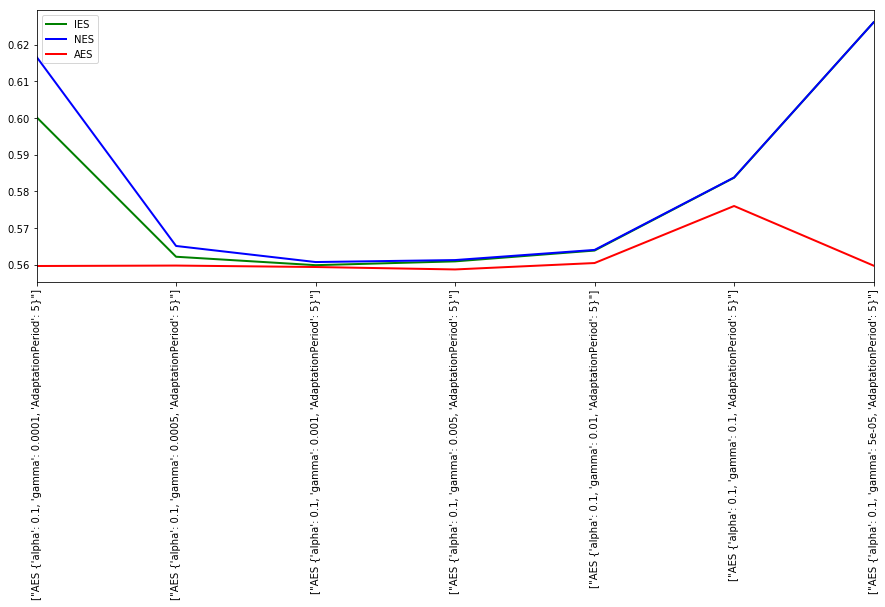

In [137]:
# compare ES methods
QualityStr = pd.DataFrame(index = ts.columns, columns = sorted(FRC_TS.keys()))

for model in sorted(QualityStr.columns):
    frc_ts = FRC_TS[model]
    QualityStr[model],_ = qualityMACAPE(ts, frc_ts)

QualityStr[sorted(QualityStr.columns)[14:21]].mean().plot(color='g', label='IES', figsize = (15, 5), linewidth=2)
QualityStr[sorted(QualityStr.columns)[21:]].mean().plot(color='b', label='NES', linewidth=2 )
ax = QualityStr[sorted(QualityStr.columns)[:7]].mean().plot(color='r', label='AES', linewidth=2 )
ax.set_xticklabels(np.reshape(np.asarray(QualityStr.columns[:7]), (1, 7)).T , rotation=90)
plt.legend()
# ax.set_xticklabels(df.C, rotation=90)

** Conclusion**: Adaptive ES has less loss (by optimal value of parameters) than other modifications ES  

In [139]:
# Sort Quality
QualityStr[QualityStr.columns].mean().sort_values()[:20]

AES {'alpha': 0.1, 'gamma': 0.005, 'AdaptationPeriod': 5}     0.558690
AES {'alpha': 0.1, 'gamma': 0.001, 'AdaptationPeriod': 5}     0.559355
AES {'alpha': 0.1, 'gamma': 0.0001, 'AdaptationPeriod': 5}    0.559629
AES {'alpha': 0.1, 'gamma': 5e-05, 'AdaptationPeriod': 5}     0.559730
AES {'alpha': 0.1, 'gamma': 0.0005, 'AdaptationPeriod': 5}    0.559749
IES {'alpha': 0.1, 'AdaptationPeriod': 5}                     0.559856
ES {'alpha': 0.1}                                             0.560255
AES {'alpha': 0.1, 'gamma': 0.01, 'AdaptationPeriod': 5}      0.560437
NES {'alpha': 0.1, 'AdaptationPeriod': 5}                     0.560708
IES {'alpha': 0.15, 'AdaptationPeriod': 5}                    0.560891
ES {'alpha': 0.15}                                            0.560958
NES {'alpha': 0.15, 'AdaptationPeriod': 5}                    0.561247
IES {'alpha': 0.05, 'AdaptationPeriod': 5}                    0.562152
ES {'alpha': 0.2}                                             0.563810
IES {'

<h1 align="center">Practice: Realization of Holt and Winters Methods </h1>

# SES to Mothly Wage Data
You need to apply IES model for TS <span style="color:blue; font-family:'New Times Roman'; font-size:14pt">monthly-wage.csv</span>.


 *  0) Forecast Wage TS with SES $\alpha=.1$.
 * 1) Find the best param $\alpha$ of SES for data period from 09.1998 to 01.2015. Is the optimal value close to 0 or 1? (You 
can choose any loss function above).
 * 2) Draw forecast with optimial value $\alpha$ for data from 09.1998 to 01.2017. 
      Conclude whether SES can be used for this TS? If can not than explain why.

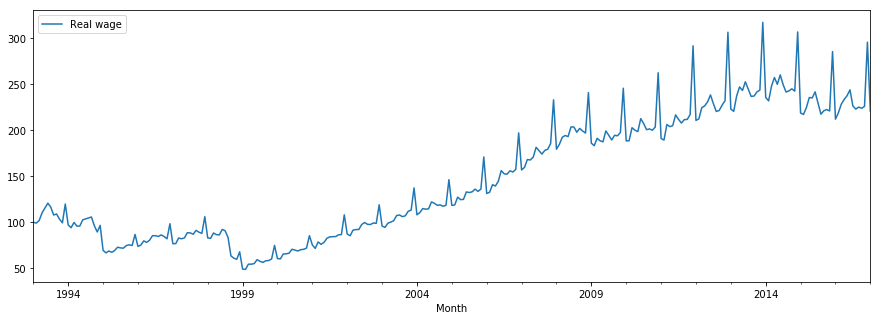

In [86]:
# draw Wage TS ones more
wage.plot(figsize=(15,5))

## 0) forecast Wage TS with SES alpha =0.1

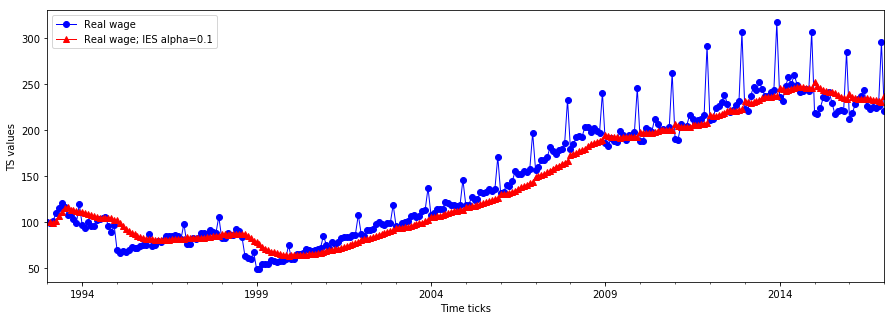

In [87]:
ESParamsArray = [{'alpha':0.1, 'AdaptationPeriod':10}]
FRC_WAGE = BuildForecast(h=1, ts=wage, AlgName =  'InitExponentialSmoothing', AlgTitle='IES' ,ParamsArray = ESParamsArray)

plotTSForecast(wage.loc['1993-01-01':'2017-01-01'], FRC_WAGE[list(FRC_WAGE)[0]].loc['1993-01-01':'2017-01-01']
               , ts_num=0, alg_title='IES alpha=0.1')

## 1) Search for the optimal $\alpha$ 

In [119]:
ALPHA = np.linspace(0.01,0.99,99)
ESParamsArray = [{'alpha':alpha, 'AdaptationPeriod':10} for alpha in ALPHA] # no more than 100 variants of parameters
FRC_WAGE = BuildForecast(h=1, ts=wage, AlgName =  'InitExponentialSmoothing', AlgTitle='IES' 
                         ,ParamsArray = ESParamsArray, step='MS')

In [120]:
# compare ES parameters
QualityStr = pd.DataFrame(index = wage.columns, columns = FRC_WAGE.keys())

ix = wage.loc['1998-09-01':'2015-01-01'].index
for param_cntr in sorted(QualityStr.columns):
    frc_wage = FRC_WAGE[param_cntr]
    QualityStr[param_cntr],_ = qualityMACAPE(wage.loc[ix], frc_wage.loc[ix])

QualityStr[QualityStr.columns].mean().sort_values()

IES {'alpha': 0.41000000000000003, 'AdaptationPeriod': 10}     0.058955
IES {'alpha': 0.42000000000000004, 'AdaptationPeriod': 10}     0.058957
IES {'alpha': 0.40000000000000002, 'AdaptationPeriod': 10}     0.058959
IES {'alpha': 0.42999999999999999, 'AdaptationPeriod': 10}     0.058967
IES {'alpha': 0.39000000000000001, 'AdaptationPeriod': 10}     0.058974
IES {'alpha': 0.38, 'AdaptationPeriod': 10}                    0.058998
IES {'alpha': 0.44, 'AdaptationPeriod': 10}                    0.058998
IES {'alpha': 0.37, 'AdaptationPeriod': 10}                    0.059048
IES {'alpha': 0.45000000000000001, 'AdaptationPeriod': 10}     0.059093
IES {'alpha': 0.36000000000000004, 'AdaptationPeriod': 10}     0.059127
IES {'alpha': 0.46000000000000002, 'AdaptationPeriod': 10}     0.059193
IES {'alpha': 0.35000000000000003, 'AdaptationPeriod': 10}     0.059271
IES {'alpha': 0.47000000000000003, 'AdaptationPeriod': 10}     0.059305
IES {'alpha': 0.48000000000000004, 'AdaptationPeriod': 10}     0

** Question**
  * Is optimal alpha less than 0.3?

## 2) draw the forecast with optimial value $\alpha $

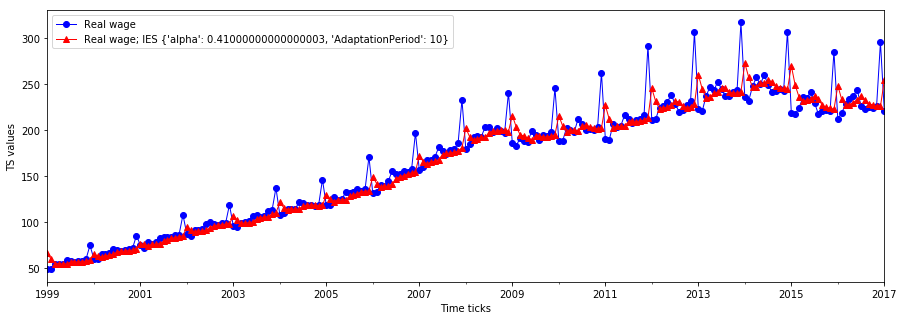

In [121]:
algName = QualityStr[QualityStr.columns].mean().sort_values().index[0]
plotTSForecast(ts = wage.loc['1999-01-01':'2017-01-01'], frc_ts= FRC_WAGE[algName].loc['1999-01-01':'2017-01-01']
               , ts_num=0, alg_title=algName)

** Question**
    * Does SES follow to the TS components?

## 3) Calculate loss of the forecast of TS in [02.2016, 01.2017]

In [91]:
qualityMACAPE(wage.loc['2016-02-01':'2017-01-01'], FRC_WAGE[algName].loc['2016-02-01':'2017-01-01'])[0]

Real wage    0.058628
dtype: float64

# SES to Yearly Wage Data
## 0) Aggregate original TS by Years

In [92]:
wage_year = wage.resample(???).sum()[:-1] # cut 2017 year
wage_year[-4:]

,Real wage
Month,
2013-01-01,2940.9
2014-01-01,3007.2
2015-01-01,2766.7
2016-01-01,2790.6


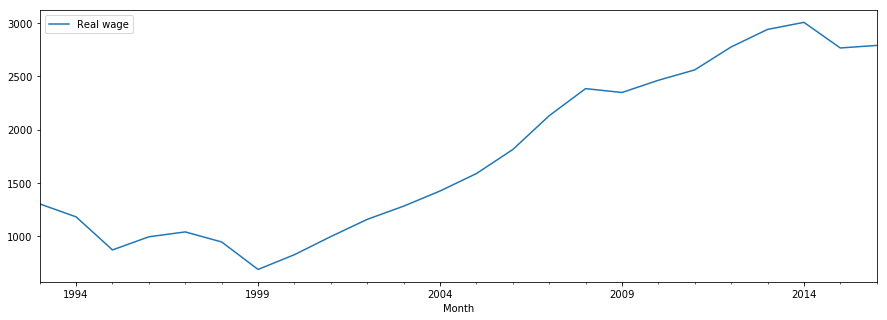

In [93]:
wage_year.plot(figsize=(15,5))

## Search of optimal $\alpha$ for aggregated data

In [94]:
ALPHA = ??? 
ESParamsArray = [{'alpha':alpha, 'AdaptationPeriod':10} for alpha in ALPHA] # no more than 100 variants of parameters
FRC_WAGE_YEAR = BuildForecast(h=1, ts=???, AlgName =  ???, AlgTitle=???
                              ,ParamsArray = ESParamsArray, step=???)

In [95]:
# compare ES parameters
QualityStr = pd.DataFrame(index = wage_year.columns, columns = FRC_WAGE_YEAR.keys())

ix = wage_year.loc['1999-01':'2010-01'].index
for param_cntr in sorted(QualityStr.columns):
    frc_wage = FRC_WAGE_YEAR[param_cntr]
    QualityStr[param_cntr],_ = qualityMACAPE(wage_year.loc[ix], frc_wage.loc[ix])

QualityStr[QualityStr.columns].mean().sort_values()[:5]

IES {'alpha': 1.0, 'AdaptationPeriod': 10}                    0.113797
IES {'alpha': 0.98999999999999999, 'AdaptationPeriod': 10}    0.114357
IES {'alpha': 0.97999999999999998, 'AdaptationPeriod': 10}    0.114926
IES {'alpha': 0.96999999999999997, 'AdaptationPeriod': 10}    0.115505
IES {'alpha': 0.96000000000000008, 'AdaptationPeriod': 10}    0.116093
dtype: float64

## Forecast with optimial value  $\alpha$ and loss MACAPE

MACAPE: Real wage    0.045954
dtype: float64


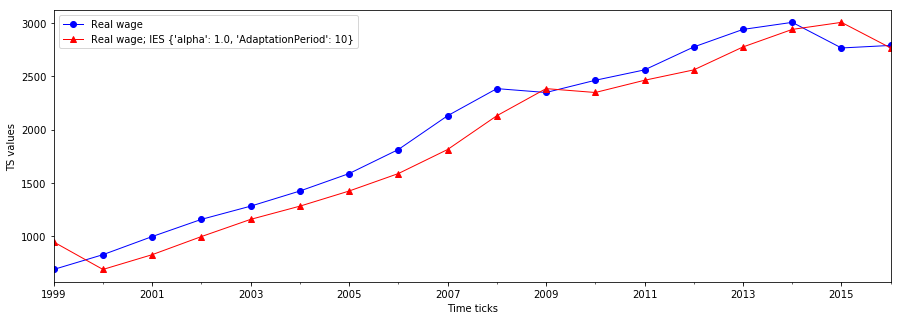

In [96]:
algName = QualityStr[QualityStr.columns].mean().sort_values().index[0]
plotTSForecast(wage_year.loc['1999-01-01':'2016-01-01'], FRC_WAGE_YEAR[algName].loc['1999-01-01':'2016-01-01']
               , ts_num=0, alg_title=algName)

print('MACAPE: %s' % qualityMACAPE(wage_year.loc['2010-01-01':'2016-01-01'], FRC_WAGE_YEAR[algName].loc['2010-01-01':'2016-01-01'])[0])

# Realize Holt model for Yearly Wage TS
You need to realize Holt model and then use it for forecasting real TS.

* 1) Realize Theil-Wage model
* 2) Find optimal params $\alpha$ (smoothing of level), $\beta$ (smoothing trend) (the forecast horizon is equal to 1)
* 3) Draw forecast with optimal values $\alpha$, $\beta$ from 1998 to 2016. 
* 4) Make conclusion about Holt models for this TS 

In [98]:
###################### Holt Exponential Smoothing #########################
# x <array Tx1>- time series, 
# h <scalar> - forecasting delay
# Params <dict> - dictionary with 
#    alpha <scalar in [0,1]> - smoothing parameter
#    beta <scalar in [0,1]> - linear trend smoothing parameter
#    
def HoltExponentialSmoothing(x, h, Params):
    T = len(x)
    alpha = Params['alpha']
    beta = Params['beta']
    AdaptationPeriod = Params['AdaptationPeriod']
    
    FORECAST = [np.NaN]*(T+h)
    if alpha>1:
        w.warn('Alpha can not be more than 1')
        #alpha = 1
        return FORECAST
    if alpha<0:
        w.warn('Alpha can not be less than 0')
        #alpha = 0
        return FORECAST
    if beta>1:
        w.warn('beta can not be more than 1')
        #beta = 1
        return FORECAST
    if beta<0:
        w.warn('beta can not be less than 0')
        #beta = 0
        return FORECAST
    
    
    l= np.NaN
    b= np.NaN
    
    for t in range(T):
        if not math.isnan(x[t]):
            if math.isnan(l):
                l = ???
                b = ??? # Caution -this is
                t0 = t
                
            l_prev = l    
                        
            if (t-t0+1)<AdaptationPeriod:
                l = ???
                b = ???
            else:
                l = ???
                b = ???
                
        FORECAST[t+h] = ???
    return FORECAST

In [118]:
ALPHA = np.linspace(0.1,1,10)
BETA = np.linspace(0.1,1,10)
HoltParamsArray = [{'alpha':alpha, 'beta':beta, 'AdaptationPeriod':5} for alpha in ALPHA for beta in BETA]
FRC_WAGE_YEAR = BuildForecast(h=1, ts=wage_year.loc['1999-01':'2016-01'], AlgName =  'HoltExponentialSmoothing', AlgTitle='Holt'
                              ,ParamsArray = HoltParamsArray, step='12MS')

QualityStr = pd.DataFrame(index = wage_year.columns, columns = FRC_WAGE_YEAR.keys())
ix = wage_year.loc['1999-01':'2014-01'].index
for param_cntr in sorted(QualityStr.columns):
    frc_wage = FRC_WAGE_YEAR[param_cntr]
    QualityStr[param_cntr],_ = qualityMACAPE(wage_year.loc[ix], frc_wage.loc[ix])

QualityStr[QualityStr.columns].mean().sort_values()[:5]

## Draw Forecast

In [ ]:
algName = QualityStr[QualityStr.columns].mean().sort_values().index[0]
plotTSForecast(wage_year, FRC_WAGE_YEAR[algName].loc['1999-01-01':'2016-01-01']
               , ts_num=0, alg_title=algName)

print('MACAPE: %s' % qualityMACAPE(wage_year.loc['2010-01-01':'2016-01-01'], FRC_WAGE_YEAR[algName].loc['2010-01-01':'2016-01-01'])[0])

** Questions**
   - Is Optimal $\beta$ less than 0.3?
   - Why the optimal $\alpha$ is close to 1 for this TS?
   - Does Forecast of Hold model look more appropriate than the forecast of SES model?

<h1 align="center"> Conclusion </h1>

** you can find HW1 here** 
  * оцените <a href="https://goo.gl/forms/SIa0Elv5PrrEnwwa2"> семинар </a>